In [11]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [7]:
image_path = '../output_video/cropped_img.jpg'
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

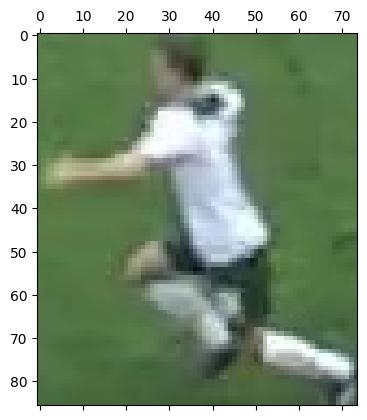

In [9]:
plt.matshow(image)
plt.show()

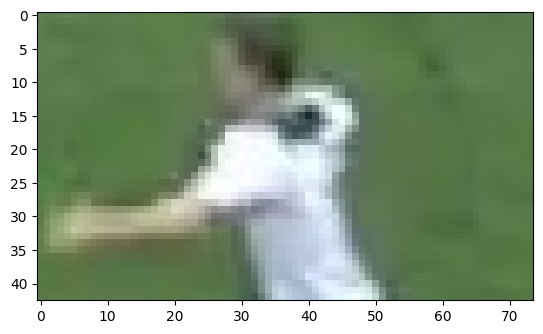

In [10]:
# take top half of image
top_half = image[0: int(image.shape[0]/2), :]
plt.imshow(top_half)

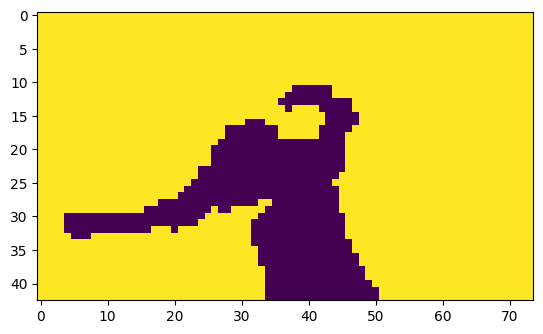

In [14]:
# reshape into 2d array
image_2d = top_half.reshape(-1, 3)

# perform kmeans 
kmeans = KMeans(n_clusters=2,
                random_state=0)
kmeans.fit(image_2d)

# get cluster labels
labels = kmeans.labels_

# reshape labels into original image_shape
clustered_image = labels.reshape(top_half.shape[0], top_half.shape[1])

# display the clustered image
plt.imshow(clustered_image)
plt.show()

In [15]:
corner_clusters = [clustered_image[0, 0],
                   clustered_image[0, -1],
                   clustered_image[-1, 0],
                   clustered_image[-1, -1]]
non_player_cluster = max(set(corner_clusters), key=corner_clusters.count)
print(non_player_cluster)

1


In [16]:
player_cluster =  1-non_player_cluster
print(player_cluster)

0


In [17]:
kmeans.cluster_centers_[player_cluster]

array([198.3375    , 208.63392857, 211.50714286])